<ipython-input-5-3d2f3a524322>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['price'] = clean_df['price'].astype(float)
<ipython-input-5-3d2f3a524322>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[scale_columns] = features
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

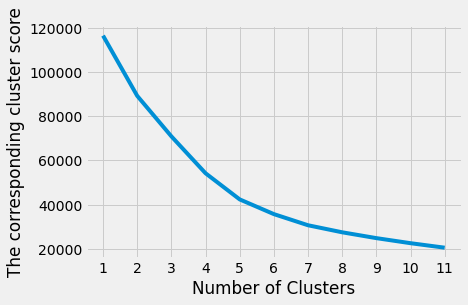

<ipython-input-5-3d2f3a524322>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['label'] = cluster_labels


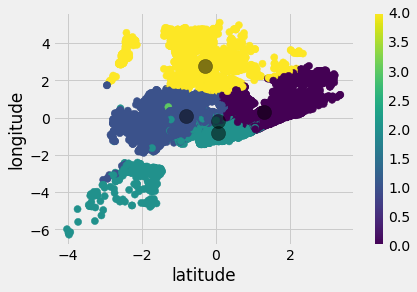

In [5]:
#For data manipulation
import pandas as pd
import numpy as np 


from sklearn.cluster import KMeans
from sklearn import metrics 
#For scaling certain parameters
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as graph


#read the dataset
df = pd.read_csv('AB_NYC_2019.csv')

#remove all the row with the missing data values
clean_df = df.dropna()

#print(clean_df.columns)
#print(clean_df.dtypes['price'])

#Converting the price column from int to float
clean_df['price'] = clean_df['price'].astype(float)

#scaling the input parameters of the model
#scale = MinMaxScaler()
#clean_df[['latitude','longitude','price']] = scale.fit_transform[clean_df['latitude','longitude','price']]
scale_columns = ['latitude' , 'longitude','price']
features = clean_df[scale_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
clean_df[scale_columns] = features


#Implementing the elbow method to get the optimal number of clusters
input_parameters = clean_df[['latitude','longitude','price']]
kmeans_args = { "init": "k-means++" ,"n_init" : 10 }
cluster_scores = []
for k in range(1,12):
    kmeans_clustering = KMeans(n_clusters = k , **kmeans_args).fit(input_parameters)
    cluster_scores.append(kmeans_clustering.inertia_)

graph.title("Deciding on the number of clusters")
#Using the Elbow method to get Select the number of clusters
graph.style.use("fivethirtyeight")
graph.plot(range(1, 12), cluster_scores)
graph.xticks(range(1, 12))
graph.xlabel("Number of Clusters")
graph.ylabel("The corresponding cluster score")
graph.show()


#Set the parameters for Kmeans Clustering
input_parameters = clean_df[['latitude','longitude','price']]
kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10).fit(input_parameters)
cluster_labels = kmeans.labels_
clean_df['label'] = cluster_labels
##print(clean_df.columns)
##kmeans.cluster_centers_
##print(clean_df)


# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
labels = kmeans.labels_
clean_df.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
graph.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)




#KMEANS++
-pros
* the Flexibility of the etire system
* Good at segmenting large datasets
* Easy to interpret with low computational costs

-cons
* Unoptimal in developing the Number of clusters
* The order of data has an affect on the final results